In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplot

In [4]:
os.chdir(r'C:\Users\nr10863\Desktop\ADS\Udacity\Term 2\Blog Post')

In [6]:
## Loading the listing data
listing=pd.read_csv('listings.csv')
calendar=pd.read_csv('calendar.csv')

In [7]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,2818,2019-12-08,f,$51.00,$51.00,3.0,1125.0
1,58211,2019-12-08,t,$175.00,$175.00,3.0,365.0
2,58211,2019-12-09,t,$175.00,$175.00,3.0,365.0
3,58211,2019-12-10,t,$175.00,$175.00,2.0,365.0
4,58211,2019-12-11,t,$175.00,$175.00,2.0,365.0


In [8]:
listing.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,277,2019-11-21,2.13,1,0
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,NaN,Centrum-Oost,52.36509,4.89354,Private room,80,1,306,2019-12-05,2.57,2,198
2,25428,Lovely apt in City Centre (w.lift) near Jordaan,56142,Joan,NaN,Centrum-West,52.37297,4.88339,Entire home/apt,125,14,3,2019-05-11,0.13,2,71
3,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.38673,4.89208,Private room,155,2,206,2019-11-11,2.14,1,251
4,28871,Comfortable double room,124245,Edwin,NaN,Centrum-West,52.36719,4.89092,Private room,75,2,318,2019-11-23,2.81,3,134


In [9]:
print('Total Records= ',listing.id.count())
print('Total Unique ids= ', listing.id.nunique())

Total Records=  20025
Total Unique ids=  20025


## How does the price vary across different room types?

In [10]:
# Looking at the number of different room types and listings associated with each room type
np1=listing.room_type.value_counts()
np1=np1.to_frame()
np1.reset_index(inplace=True)
np1.columns=['Room_Type','Listings']
np1

,Room_Type,Listings
0,Entire home/apt,15579
1,Private room,4060
2,Hotel room,328
3,Shared room,58


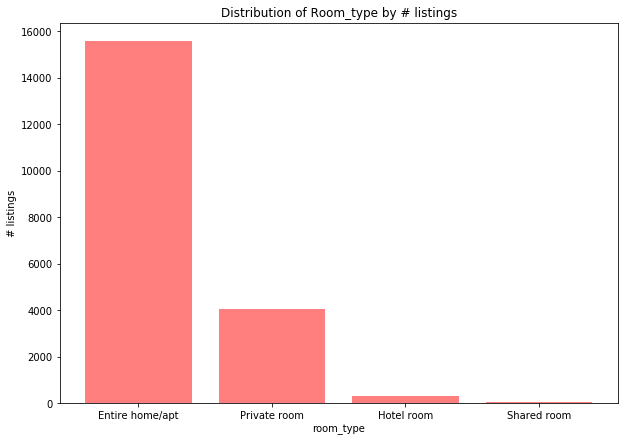

In [11]:
from matplotlib.pyplot import figure
from numpy import array
objects = np1.Room_Type.unique()
y_pos = np.arange(len(objects))

figure(figsize=(10,7))
plt.bar(y_pos, np1.Listings, align='center', alpha=0.5,color='red')
plt.xticks(y_pos, objects)
plt.ylabel('# listings')
plt.xlabel('room_type')
plt.title('Distribution of Room_type by # listings')

plt.show()

In [12]:
listing['price'].describe(percentiles=[0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99,0.995,0.999,1])

count    20025.000000
mean       163.251685
std        198.538156
min          0.000000
5%          60.000000
10%         75.000000
20%         90.000000
30%        100.000000
40%        120.000000
50%        130.000000
60%        150.000000
70%        175.000000
80%        200.000000
90%        255.000000
95%        345.000000
99%        600.000000
99.5%      848.800000
99.9%     1599.424000
100%      9000.000000
max       9000.000000
Name: price, dtype: float64

In [13]:
room_type_rates = listing.groupby('room_type').agg({'price': ['mean', 'min', 'max','median']})
room_type_rates.columns=['mean_price','min_price','max_price','median_price']

In [14]:
room_type_rates=room_type_rates.reset_index()
room_type_rates

,room_type,mean_price,min_price,max_price,median_price
0,Entire home/apt,175.325310,0,9000,149.0
1,Hotel room,256.878049,20,4500,185.0
2,Private room,110.068966,10,9000,88.0
3,Shared room,113.551724,25,525,62.5


<Figure size 720x720 with 0 Axes>

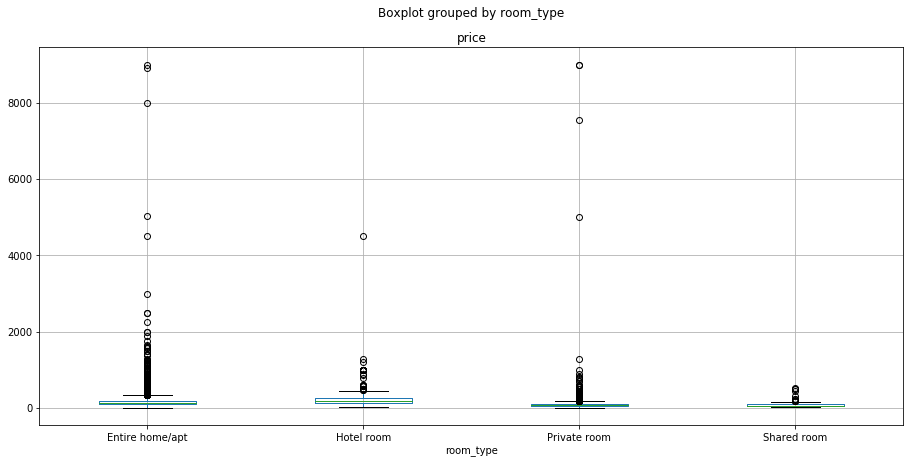

In [15]:
fig = plt.figure(1, figsize=(10, 10))
box_plt=listing.boxplot('price', by='room_type',figsize=(15, 7))

Text(0.5, 0, 'Price')

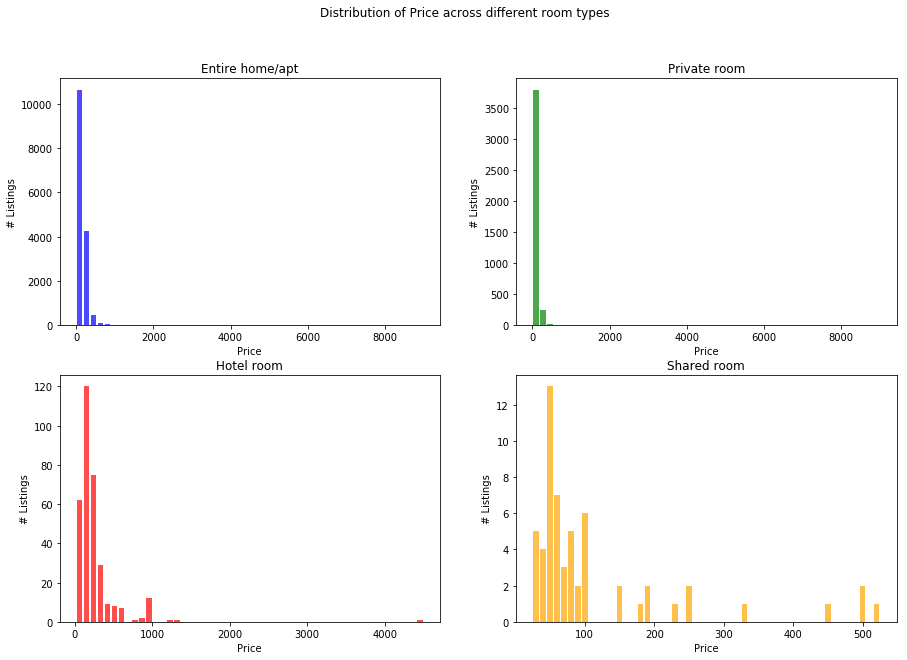

In [17]:
## Plotting the distribution of price across different room types

fig, axs = plt.subplots(2,2,figsize=(15,10))
fig.suptitle('Distribution of Price across different room types')

plt.subplot(2,2,1)
plt.hist(listing[listing['room_type']=='Entire home/apt'].price, bins=50, color='blue',alpha=0.7, rwidth=0.8)
plt.title('Entire home/apt')
plt.ylabel('# Listings')
plt.xlabel('Price')


plt.subplot(2,2,2)
plt.hist(listing[listing['room_type']=='Private room'].price, bins=50, color='green',alpha=0.7, rwidth=0.8)
plt.title('Private room')
plt.ylabel('# Listings')
plt.xlabel('Price')

plt.subplot(2,2,3)
plt.hist(listing[listing['room_type']=='Hotel room'].price, bins=50, color='red',alpha=0.7, rwidth=0.8)
plt.title('Hotel room')
plt.ylabel('# Listings')
plt.xlabel('Price')

plt.subplot(2,2,4)
plt.hist(listing[listing['room_type']=='Shared room'].price, bins=50, color='orange',alpha=0.7, rwidth=0.8)
plt.title('Shared room')
plt.ylabel('# Listings')
plt.xlabel('Price')

In [18]:
ranges = [0,60.000000 ,75.000000 ,90.000000 ,100.000000 ,120.000000 ,130.000000 ,150.000000 ,175.000000 ,200.000000 ,255.000000 ,345.000000 ,600.000000 ,848.800000 ,1599.424000 ,9000.000000,9001]
labels = [str(ranges[i])+'-'+str(ranges[i+1]) for i in range(0,16)]

In [19]:
dict_1 = dict(zip(ranges[0:15], labels))
dict_1

{0: '0-60.0',
 60.0: '60.0-75.0',
 75.0: '75.0-90.0',
 90.0: '90.0-100.0',
 100.0: '100.0-120.0',
 120.0: '120.0-130.0',
 130.0: '130.0-150.0',
 150.0: '150.0-175.0',
 175.0: '175.0-200.0',
 200.0: '200.0-255.0',
 255.0: '255.0-345.0',
 345.0: '345.0-600.0',
 600.0: '600.0-848.8',
 848.8: '848.8-1599.424',
 1599.424: '1599.424-9000.0'}

In [20]:
listing['buckets']=0
for i in ranges[0:15]:
    listing['buckets'] = np.where(listing['price']>=i, dict_1[i], listing['buckets'])

In [21]:
test=listing[['price', 'buckets']]

In [22]:
test[test['price']>=9000]

,price,buckets
120,9000,1599.424-9000.0
123,9000,1599.424-9000.0
16995,9000,1599.424-9000.0


In [26]:
df2 = df2.reset_index(level=0)
df2['sum_room_type'] = df2.groupby('room_type')['id'].sum()

In [28]:
df2['id_perc'] = df2['id']/df2['sum_room_type']

In [402]:
df2.groupby('room_type')['id'].sum()

room_type
Entire home/apt    15579
Hotel room           328
Private room        4060
Shared room           58
Name: id, dtype: int64

In [407]:
df2.groupby('room_type')['id'].sum().reset_index()

,room_type,id
0,Entire home/apt,15579
1,Hotel room,328
2,Private room,4060
3,Shared room,58


In [29]:
df2=listing[['id','buckets','room_type']].groupby(['room_type','buckets']).count()
df2=df2.reset_index()
df2['sum_room_type']=df2.groupby('room_type')['id'].transform(np.sum)
df2['id_perc'] = df2['id']/df2['sum_room_type']
df2.reset_index(inplace=True)
df2.head()

,index,room_type,buckets,id,sum_room_type,id_perc
0,0,Entire home/apt,0-60.0,137,15579,0.008794
1,1,Entire home/apt,100.0-120.0,2056,15579,0.131973
2,2,Entire home/apt,120.0-130.0,1589,15579,0.101996
3,3,Entire home/apt,130.0-150.0,1739,15579,0.111625
4,4,Entire home/apt,150.0-175.0,2179,15579,0.139868


In [30]:
df2.head(2)

,index,room_type,buckets,id,sum_room_type,id_perc
0,0,Entire home/apt,0-60.0,137,15579,0.008794
1,1,Entire home/apt,100.0-120.0,2056,15579,0.131973


In [41]:
df3=df2.pivot(index='buckets',columns='room_type',values='id_perc')
df3=df3.reset_index(level=0)
df3.fillna(0, inplace=True)
df3

room_type,buckets,Entire home/apt,Hotel room,Private room,Shared room
0,0-60.0,0.008794,0.033537,0.153695,0.465517
1,100.0-120.0,0.131973,0.045732,0.117734,0.086207
2,120.0-130.0,0.101996,0.042683,0.062562,0.000000
3,130.0-150.0,0.111625,0.082317,0.054926,0.000000
4,150.0-175.0,0.139868,0.091463,0.056404,0.034483
5,1599.424-9000.0,0.001027,0.003049,0.000985,0.000000
6,175.0-200.0,0.097952,0.131098,0.031527,0.051724
7,200.0-255.0,0.138263,0.161585,0.034483,0.051724
8,255.0-345.0,0.058219,0.128049,0.011576,0.017241
9,345.0-600.0,0.046730,0.091463,0.008374,0.068966


In [42]:
mapping=pd.read_csv('mapping.csv')
mapping.head()

,buckets,Rank
0,0-60.0,1
1,60.0-75.0,2
2,75.0-90.0,3
3,90.0-100.0,4
4,100.0-120.0,5


In [43]:
df3=df3.merge(mapping,left_on='buckets',right_on='buckets', how='left')
df3=df3.sort_values('Rank')
df3.reset_index()

,index,buckets,Entire home/apt,Hotel room,Private room,Shared room,Rank
0,0,0-60.0,0.008794,0.033537,0.153695,0.465517,1
1,10,60.0-75.0,0.019193,0.033537,0.161576,0.086207,2
2,12,75.0-90.0,0.061108,0.054878,0.202217,0.103448,3
3,14,90.0-100.0,0.072854,0.039634,0.101478,0.034483,4
4,1,100.0-120.0,0.131973,0.045732,0.117734,0.086207,5
5,2,120.0-130.0,0.101996,0.042683,0.062562,0.000000,6
6,3,130.0-150.0,0.111625,0.082317,0.054926,0.000000,7
7,4,150.0-175.0,0.139868,0.091463,0.056404,0.034483,8
8,6,175.0-200.0,0.097952,0.131098,0.031527,0.051724,9
9,7,200.0-255.0,0.138263,0.161585,0.034483,0.051724,10


In [45]:
df3

,buckets,Entire home/apt,Hotel room,Private room,Shared room,Rank
0,0-60.0,0.008794,0.033537,0.153695,0.465517,1
10,60.0-75.0,0.019193,0.033537,0.161576,0.086207,2
12,75.0-90.0,0.061108,0.054878,0.202217,0.103448,3
14,90.0-100.0,0.072854,0.039634,0.101478,0.034483,4
1,100.0-120.0,0.131973,0.045732,0.117734,0.086207,5
2,120.0-130.0,0.101996,0.042683,0.062562,0.000000,6
3,130.0-150.0,0.111625,0.082317,0.054926,0.000000,7
4,150.0-175.0,0.139868,0.091463,0.056404,0.034483,8
6,175.0-200.0,0.097952,0.131098,0.031527,0.051724,9
7,200.0-255.0,0.138263,0.161585,0.034483,0.051724,10


In [46]:
df3.columns=['buckets','Entire home/apt', 'Hotel room', 'Private room', 'Shared room', 'Rank']
df3=df3.drop(['Rank'],axis=1)

In [47]:
df3.columns=['Price_bucket','Entire home/apt', 'Hotel room', 'Private room', 'Shared room']
df3

,Price_bucket,Entire home/apt,Hotel room,Private room,Shared room
0,0-60.0,0.008794,0.033537,0.153695,0.465517
10,60.0-75.0,0.019193,0.033537,0.161576,0.086207
12,75.0-90.0,0.061108,0.054878,0.202217,0.103448
14,90.0-100.0,0.072854,0.039634,0.101478,0.034483
1,100.0-120.0,0.131973,0.045732,0.117734,0.086207
2,120.0-130.0,0.101996,0.042683,0.062562,0.000000
3,130.0-150.0,0.111625,0.082317,0.054926,0.000000
4,150.0-175.0,0.139868,0.091463,0.056404,0.034483
6,175.0-200.0,0.097952,0.131098,0.031527,0.051724
7,200.0-255.0,0.138263,0.161585,0.034483,0.051724


In [48]:
import seaborn as sns
cm = sns.light_palette("green", as_cmap=True)

In [49]:
s = df3.style.background_gradient(cmap=cm)
s

,Price_bucket,Entire home/apt,Hotel room,Private room,Shared room
0,0-60.0,0.00879389,0.0335366,0.153695,0.465517
10,60.0-75.0,0.0191925,0.0335366,0.161576,0.0862069
12,75.0-90.0,0.0611079,0.054878,0.202217,0.103448
14,90.0-100.0,0.0728545,0.0396341,0.101478,0.0344828
1,100.0-120.0,0.131973,0.0457317,0.117734,0.0862069
2,120.0-130.0,0.101996,0.0426829,0.0625616,0
3,130.0-150.0,0.111625,0.0823171,0.0549261,0
4,150.0-175.0,0.139868,0.0914634,0.0564039,0.0344828
6,175.0-200.0,0.0979524,0.131098,0.0315271,0.0517241
7,200.0-255.0,0.138263,0.161585,0.0344828,0.0517241


In [50]:
room_type_rates = listing.groupby('room_type').agg({'price': ['mean', 'min', 'max','median']})
room_type_rates.columns=['mean_price','min_price','max_price','median_price']

In [51]:
room_type_rates.reset_index(inplace=True)

In [52]:
room_type_rates

,room_type,mean_price,min_price,max_price,median_price
0,Entire home/apt,175.325310,0,9000,149.0
1,Hotel room,256.878049,20,4500,185.0
2,Private room,110.068966,10,9000,88.0
3,Shared room,113.551724,25,525,62.5


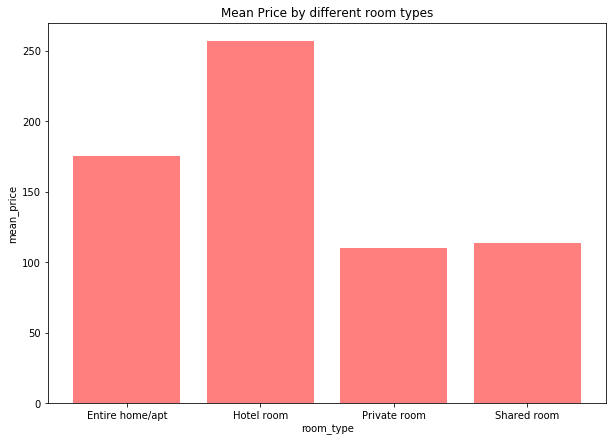

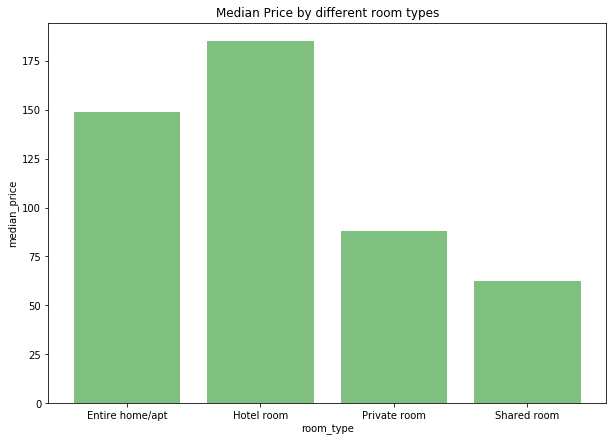

In [53]:
objects = room_type_rates.room_type.unique()
y_pos = np.arange(len(objects))

figure(figsize=(10,7))
plt.bar(y_pos, room_type_rates.mean_price, align='center', alpha=0.5,color='red')
plt.xticks(y_pos, objects)
plt.ylabel('mean_price')
plt.xlabel('room_type')
plt.title('Mean Price by different room types')

plt.show()


figure(figsize=(10,7))
plt.bar(y_pos, room_type_rates.median_price, align='center', alpha=0.5,color='green')
plt.xticks(y_pos, objects)
plt.ylabel('median_price')
plt.xlabel('room_type')
plt.title('Median Price by different room types')

plt.show()

In [ ]:
# Getting the average values
listing['year'] = pd.DatetimeIndex(listing['last_review']).year
listing['month'] = pd.DatetimeIndex(listing['last_review']).month

In [60]:
listing.year.value_counts()

2019.0    11892
2018.0     2462
2017.0     1871
2016.0     1040
2015.0      309
2014.0       35
2013.0        9
2012.0        3
Name: year, dtype: int64

In [71]:
listing.head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,buckets,year,month,yrmon
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,277,2019-11-21,2.13,1,0,0-60.0,2019.0,11.0,2030.0


In [77]:
# Plotting the average values by year (Only getting average values post 2015)

df4=listing[listing['year']>2014].groupby('year').agg({'price': ['mean','median']})
df4=df4.reset_index()
df4.columns=['year','mean_price', 'median_price']
df4

,year,mean_price,median_price
0,2015.0,130.686084,110
1,2016.0,126.229808,110
2,2017.0,142.047568,120
3,2018.0,150.545085,125
4,2019.0,163.722923,140


In [79]:
# Plotting the average values by months (Only getting average values for 2019 months)

df5=listing[listing['year']==2019].groupby('month').agg({'price': ['mean','median']})
df5=df5.reset_index()
df5.columns=['month','mean_price', 'median_price']
df5

,month,mean_price,median_price
0,1.0,152.605536,130.0
1,2.0,145.313187,130.0
2,3.0,144.491803,120.0
3,4.0,180.812796,148.5
4,5.0,165.506977,140.0
5,6.0,162.550365,140.0
6,7.0,171.579670,149.0
7,8.0,177.130054,150.0
8,9.0,165.914017,149.0
9,10.0,177.070682,150.0


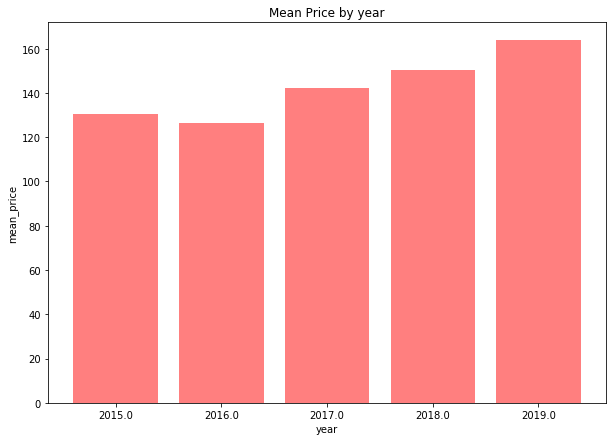

In [81]:
objects = df4.year.unique()
y_pos = np.arange(len(objects))

figure(figsize=(10,7))
plt.bar(y_pos, df4.mean_price, align='center', alpha=0.5,color='red')
plt.xticks(y_pos, objects)
plt.ylabel('mean_price')
plt.xlabel('year')
plt.title('Mean Price by year')

plt.show()

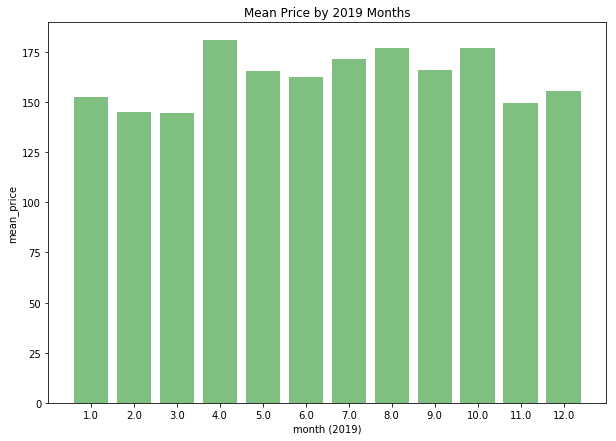

In [82]:
objects = df5.month.unique()
y_pos = np.arange(len(objects))

figure(figsize=(10,7))
plt.bar(y_pos, df5.mean_price, align='center', alpha=0.5,color='green')
plt.xticks(y_pos, objects)
plt.ylabel('mean_price')
plt.xlabel('month (2019)')
plt.title('Mean Price by 2019 Months')

plt.show()

## Which neighborhood has most listings?

In [568]:
df_nb=listing.neighbourhood.value_counts()
df_nb=df_nb.reset_index()
df_nb.columns=['Neighbourhood','#Listings']
df_nb.head()

,Neighbourhood,#Listings
0,De Baarsjes - Oud-West,3391
1,De Pijp - Rivierenbuurt,2477
2,Centrum-West,2186
3,Centrum-Oost,1744
4,Westerpark,1471


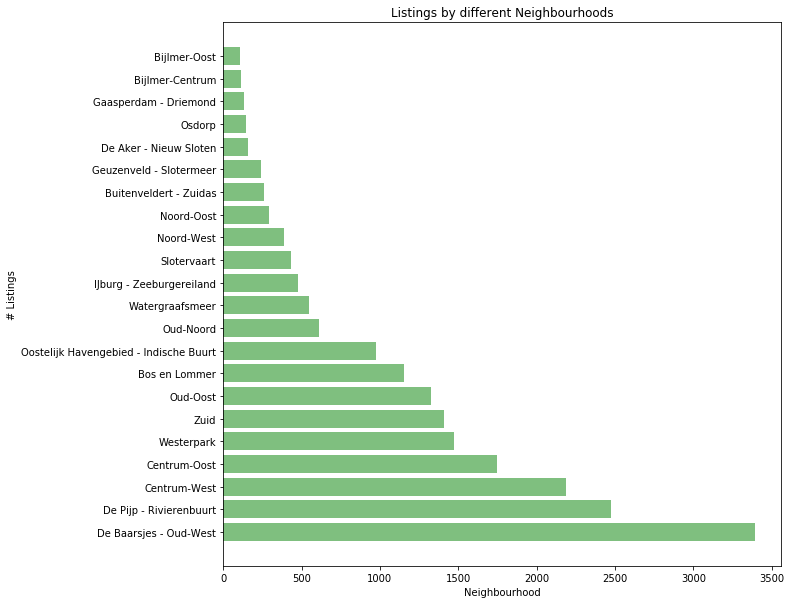

In [576]:
objects = df_nb.Neighbourhood.unique()
y_pos = np.arange(len(objects))

figure(figsize=(10,10))
plt.barh(y_pos,df_nb['#Listings'], alpha=0.5,color='green')
plt.yticks(y_pos, objects)
plt.ylabel('# Listings')
plt.xlabel('Neighbourhood')
plt.title('Listings by different Neighbourhoods')

plt.show()

## Does the neighbourhood affect the price of the listing? Which neighborhoods have highest cost? Which neighborhods have the lowest cost?

In [581]:
dfnb1 = listing.groupby('neighbourhood').agg({'price': ['mean','median']})
dfnb1.reset_index(inplace=True)

In [584]:
dfnb1.columns=['neighbourhood','mean_price','median_price']
dfnb1=dfnb1.sort_values('mean_price', ascending=False)

In [585]:
dfnb1.head()

,neighbourhood,mean_price,median_price
5,Centrum-West,214.680238,160.0
4,Centrum-Oost,201.428899,156.0
21,Zuid,185.839375,145.0
16,Oud-Noord,171.484401,125.0
11,IJburg - Zeeburgereiland,170.741053,149.0


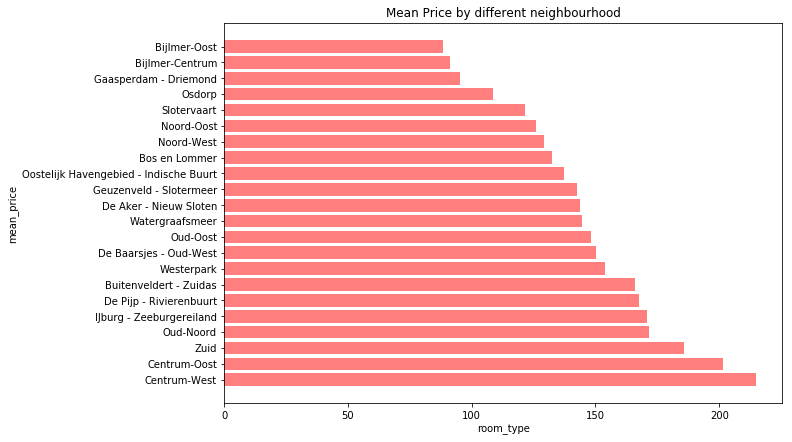

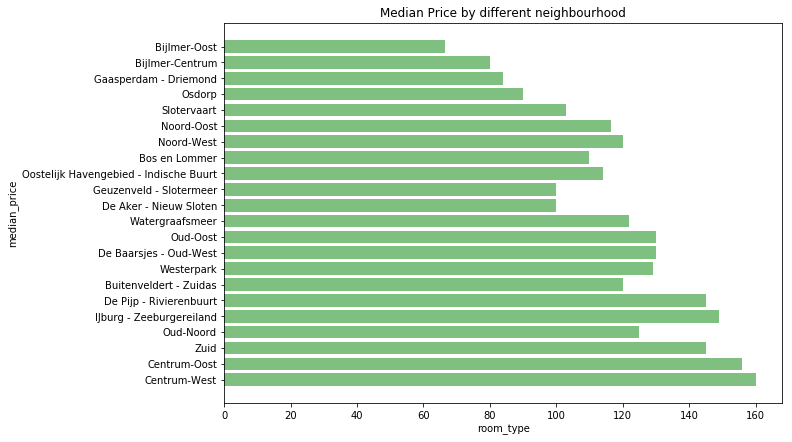

In [587]:
objects = dfnb1.neighbourhood.unique()
y_pos = np.arange(len(objects))

figure(figsize=(10,7))
plt.barh(y_pos, dfnb1.mean_price, align='center', alpha=0.5,color='red')
plt.yticks(y_pos, objects)
plt.ylabel('mean_price')
plt.xlabel('room_type')
plt.title('Mean Price by different neighbourhood')

plt.show()


figure(figsize=(10,7))
plt.barh(y_pos, dfnb1.median_price, align='center', alpha=0.5,color='green')
plt.yticks(y_pos, objects)
plt.ylabel('median_price')
plt.xlabel('room_type')
plt.title('Median Price by different neighbourhood')

plt.show()